In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

Tạo dữ liệu rời rạc

In [ ]:
x_train = torch.tensor([[50], [60], [70], [80], [90], [100]], dtype=torch.float32)
y_train = torch.tensor([1.5, 1.9, 2.1, 2.5, 2.8, 3.1], dtype=torch.float32).reshape(-1, 1)

Vẽ các điểm dữ liệu này (optional)

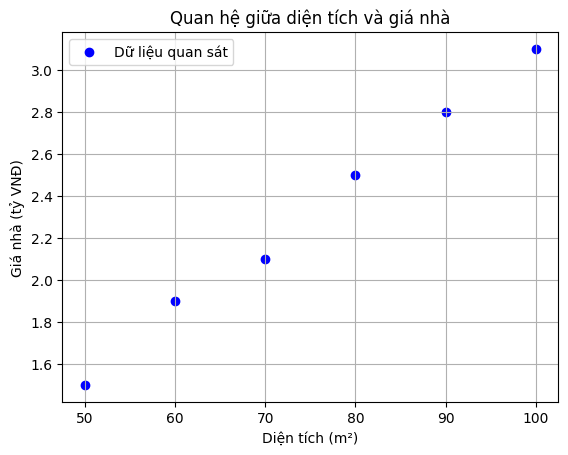

In [ ]:
# Vẽ scatter plot
plt.scatter(X, y, color='blue', label='Dữ liệu quan sát')


# Thêm nhãn và tiêu đề
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá nhà (tỷ VNĐ)")
plt.title("Quan hệ giữa diện tích và giá nhà")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=[20, 20, 5], activation='tanh'): # nếu không truyền activation, thì mặc định là tanh

        super(MyNeuralNetwork, self).__init__() # tạm thời không hiểu, chỉ biết nó khởi tạo cái gì đó và cần thiết phải đánh ra

        layers = [] # tạo vùng chứa rỗng
        layers.append(nn.Linear(input_size, hidden_size[0]))
        # append tức là thêm phần tử mới vào layers;

        # nn.Linear chỉ là viết tắt của phương trình wx + b của neural
        if activation == 'relu':
            layers.append(nn.ReLU())
        elif activation == 'sigmoid':
            layers.append(nn.Sigmoid())
        elif activation == 'tanh':
            layers.append(nn.Tanh())
        else:
            layers.append(nn.Softplus())

        for i in range(len(hidden_size) - 1):
            layers.append(nn.Linear(hidden_size[i], hidden_size[i+1]))
            if activation == 'relu':
                layers.append(nn.ReLU())
            elif activation == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation == 'tanh':
                layers.append(nn.Tanh())
            else:
                layers.append(nn.Softplus())

        layers.append(nn.Linear(hidden_size[-1], output_size)) # Dấu [-1] trong Python nghĩa là phần tử cuối cùng của danh sách.

        self.network = nn.Sequential(*layers) # *layers có nghĩa là mở danh sách ra, truyền từng phần tử riêng lẻ vào hàm.

    def forward(self, x):
        return self.network(x)

# Tự động tính đạo hàm (Auto-diff)

In [ ]:
# Auto differential
def auto_grad(u, x, order=1):
    if order == 1:#n nếu đạo hàm bậc 1
        return torch.autograd.grad(u, x, torch.ones_like(u), retain_graph=True, create_graph=True)[0] # đạo hàm u theo x
    return auto_grad(auto_grad(u, x), x, order - 1) # đạo hàm bậc cao hơn, là bậc 2

Tính phần dư

In [ ]:
def loss_function(y_true, y_pred):
    residuals = y_true - y_pred
    return torch.mean(residuals ** 2)

Training loop

In [ ]:
# Đây là "trái tim" của quá trình học.
num_epochs = 1000 # Số lần "học" đi học lại toàn bộ dữ liệu
model= MyNeuralNetwork(input_size = 1, output_size = 1, hidden_size=[10, 10, 10], activation='relu')

# lấy parameter đó để tối ưu
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # --- A. Forwarpass (Dự đoán) ---
    # Đưa dữ liệu huấn luyện vào mô hình
    y_pred = model(x_train)

    # --- B. Calculate Loss (Tính độ sai) ---
    # So sánh dự đoán (y_pred) với kết quả thật (y_train)
    loss = loss_function(y_train, y_pred)

    # --- C. Backward pass (Tính đạo hàm) ---
    # 1. Xóa đạo hàm cũ (rất quan trọng)
    optimizer.zero_grad()
    # 2. Tự động tính đạo hàm của loss theo TẤT CẢ tham số
    loss.backward()

    # --- D. Update Model (Cập nhật tham số) ---
    # Dùng thuật toán tối ưu để cập nhật các trọng số W, b
    optimizer.step()

    # In ra tiến độ
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.9016
Epoch [200/1000], Loss: 0.0014
Epoch [300/1000], Loss: 0.0014
Epoch [400/1000], Loss: 0.0014
Epoch [500/1000], Loss: 0.0014
Epoch [600/1000], Loss: 0.0014
Epoch [700/1000], Loss: 0.0014
Epoch [800/1000], Loss: 0.0014
Epoch [900/1000], Loss: 0.0014
Epoch [1000/1000], Loss: 0.0014


#Đánh giá mô hình

In [ ]:
model.eval() # Chuyển mô hình sang chế độ "đánh giá"
with torch.no_grad(): # Không cần tính đạo hàm nữa
    loss_eval = loss_function(y_train, y_pred)
    print(f'Loss trên tập kiểm thử: {loss_eval.item():.4f}')

Loss trên tập kiểm thử: 0.0014


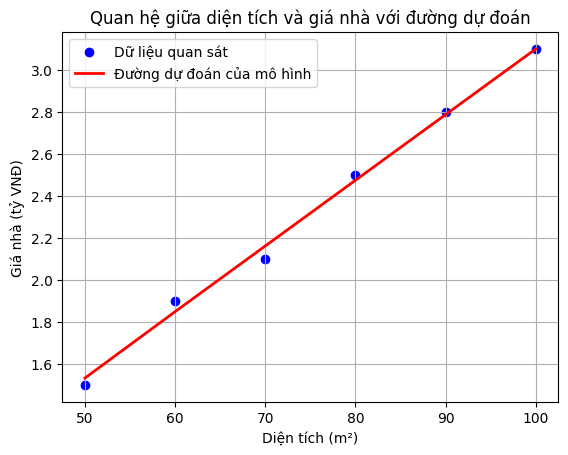

In [ ]:
# Chuyển đổi dữ liệu và dự đoán sang định dạng numpy để vẽ
# x_train và y_train đã là numpy arrays, nên không cần chuyển đổi lại
y_pred_eval_np = model(x_train).detach().numpy()

# Vẽ scatter plot các điểm dữ liệu gốc
plt.scatter(x_train, y_train, color='blue', label='Dữ liệu quan sát')

# Vẽ đường dự đoán của mô hình
plt.plot(x_train, y_pred_eval_np, color='red', linestyle='-', linewidth=2, label='Đường dự đoán của mô hình')

# Thêm nhãn và tiêu đề
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá nhà (tỷ VNĐ)")
plt.title("Quan hệ giữa diện tích và giá nhà với đường dự đoán")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [ ]:
print("Các tham số cuối cùng của mô hình:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Tên lớp: {name}, Giá trị: {param.data.numpy()}")

Các tham số cuối cùng của mô hình:
Tên lớp: network.0.weight, Giá trị: [[-0.89416635]
 [-0.05821586]
 [-0.02978253]
 [-0.79078114]
 [ 0.20603693]
 [-0.8157685 ]
 [-0.8573065 ]
 [-0.68457615]
 [-0.7121886 ]
 [-0.04900718]]
Tên lớp: network.0.bias, Giá trị: [-0.4029101   0.02653694 -0.22206593 -0.03123236  0.05217008 -0.5555005
 -0.77861404 -0.92280614  0.1934799  -0.20904195]
Tên lớp: network.2.weight, Giá trị: [[-0.02588699 -0.04627007 -0.25987786  0.26024383  0.28592274  0.31273314
   0.02007682  0.31186864 -0.23320797  0.15992248]
 [-0.20637663 -0.17353988  0.2246721  -0.2605184  -0.00116951 -0.17497347
  -0.2253572   0.01011233 -0.04935774  0.075362  ]
 [-0.00612924 -0.262039    0.25999585  0.07344363  0.09170636  0.14550568
   0.2235764   0.21443762  0.0592155  -0.20982596]
 [-0.2942116  -0.03777543  0.30448642 -0.26035643  0.0657888   0.27023226
   0.08076018  0.21995145 -0.228448    0.25697222]
 [ 0.19893149 -0.2251481   0.06365386 -0.27722853  0.07283463 -0.3133173
  -0.11920376